<a href="https://colab.research.google.com/github/oreoluwaodeyinka/data_analytics_25/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oreoluwa Odeyinka
Python for Data Analytics Winter 2025

## Project One Description
Project goal: The goal of this project is to analyze student test performance

* pick any school in this dataset as an initial comparison point
* pick a feature/measure/score
* compare above school to schools in the entire dataset, schools in a
particular borough, or schools in a particular district - you only need
to do one additional comparison point (but you’re welcome to do
more comparisons if you feel compelled to do so)
* the analysis should include some descriptive statistics
* the analysis should include one cleaning task (or more)
* the analysis should include one visualization (or more)
* the analysis should include a brief conclusion statement (not more
than two or three sentences)
the task


## Project 1


In [19]:
#Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

sns.set(style='whitegrid')

In [20]:
#Reading the CSV file
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df.describe()


,Year,Total Tested
count,"212,331.00","212,331.00"
mean,"2,015.96",49.36
std,0.80,93.02
min,"2,015.00",1.00
25%,"2,015.00",5.00
50%,"2,016.00",20.00
75%,"2,017.00",57.00
max,"2,017.00","1,729.00"


In [21]:
# Checking to see dat types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [22]:
#Looking at the first 5 rows of the file to determine what the data looks like
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


### Clean The Data

In [23]:
#Clean column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
df.columns

Index(['school_dbn', 'school_name', 'school_level', 'regents_exam', 'year',
       'total_tested', 'mean_score', 'number_scoring_below_65',
       'percent_scoring_below_65', 'number_scoring_65_or_above',
       'percent_scoring_65_or_above', 'number_scoring_80_or_above',
       'percent_scoring_80_or_above', 'number_scoring_cr',
       'percent_scoring_cr'],
      dtype='object')

In [24]:
#Starting to clean the data by checking for null values
print('Missing values per column:')
print(df.isna().sum())

Missing values per column:
school_dbn                      0
school_name                     0
school_level                    0
regents_exam                   10
year                            0
total_tested                    0
mean_score                      0
number_scoring_below_65         0
percent_scoring_below_65        0
number_scoring_65_or_above      0
percent_scoring_65_or_above     0
number_scoring_80_or_above      0
percent_scoring_80_or_above     0
number_scoring_cr               0
percent_scoring_cr              0
dtype: int64


In [27]:
# Inspect unique values in regents_exam
df['regents_exam'].unique()[:20]

array(['Common Core Algebra', 'Living Environment', 'Common Core English',
       'Algebra2/Trigonometry', 'Common Core Algebra2',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Physical Settings/Chemistry', 'Physical Settings/Earth Science',
       'U.S. History and Government', 'Physical Settings/Physics', nan],
      dtype=object)

In [25]:
# The only column column that has null values is regents_exam so changing those null values to Undefined

#df['regents_exam']= df['regents_exam'].fillna('Undefined', inplace=True)

In [26]:
df.isna().sum()

,0
school_dbn,0
school_name,0
school_level,0
regents_exam,10
year,0
total_tested,0
mean_score,0
number_scoring_below_65,0
percent_scoring_below_65,0
number_scoring_65_or_above,0


In [29]:
#Checking to see the exact columns that are null
df[df['regents_exam'].isnull()]

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
18654,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,90,55.6,61,67.8,29,32.2,6,6.7,0,0
52756,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,81,55.9,55,67.9,26,32.1,5,6.2,0,0
52757,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,9,53.4,6,66.7,3,33.3,1,11.1,0,0
100865,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,5,s,s,s,s,s,s,s,na,na
100866,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.4,34,63,20,37,6,11.1,0,0
100867,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,31,s,s,s,s,s,s,s,na,na
138300,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,54,57.3,34,63,20,37,5,9.3,0,0
138301,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,36,53.2,27,75,9,25,1,2.8,0,0
209785,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,12,59,9,75,3,25,1,8.3,0,0
209786,84M478,Inwood Academy for Leadership Charter School,Secondary School,NaN,2015,78,55.1,52,66.7,26,33.3,5,6.4,0,0


In [30]:
#replacing the columns that are null with Undefined
df['regents_exam'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2824181534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['regents_exam'].fillna('Unknown', inplace=True)


In [32]:
#Checking to make sure our modification worked
print(df.isna().sum())

school_dbn                     0
school_name                    0
school_level                   0
regents_exam                   0
year                           0
total_tested                   0
mean_score                     0
number_scoring_below_65        0
percent_scoring_below_65       0
number_scoring_65_or_above     0
percent_scoring_65_or_above    0
number_scoring_80_or_above     0
percent_scoring_80_or_above    0
number_scoring_cr              0
percent_scoring_cr             0
dtype: int64


In [41]:
#Changing the data types of the columns to numerical
numerical_cols = ['mean_score','number_scoring_below_65','percent_scoring_below_65','number_scoring_65_or_above', 'percent_scoring_65_or_above', 'number_scoring_80_or_above', 'percent_scoring_80_or_above', 'number_scoring_cr', 'percent_scoring_cr']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [43]:
#Changing the data types of columns school_dbn, school_name, school_level, and regents_exam into categories
categorical_cols = [
    'school_dbn', 'school_name', 'school_level', 'regents_exam']

for col in categorical_cols:
    df[col] = df[col].astype('category')

df[categorical_cols].dtypes

,0
school_dbn,category
school_name,category
school_level,category
regents_exam,category


In [44]:
#Checking to see if the data types did in fact change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   school_dbn                   212331 non-null  category
 1   school_name                  212331 non-null  category
 2   school_level                 212331 non-null  category
 3   regents_exam                 212331 non-null  category
 4   year                         212331 non-null  int64   
 5   total_tested                 212331 non-null  int64   
 6   mean_score                   137109 non-null  float64 
 7   number_scoring_below_65      137109 non-null  float64 
 8   percent_scoring_below_65     137109 non-null  float64 
 9   number_scoring_65_or_above   137109 non-null  float64 
 10  percent_scoring_65_or_above  137109 non-null  float64 
 11  number_scoring_80_or_above   137109 non-null  float64 
 12  percent_scoring_80_or_above  137109 non-null

## Pick A School

Objective 1: pick any school in this dataset as an initial comparison point

The school I am choosing is Cascades High School

In [36]:
#Looking at a list of school names so I can pick a school

school_names = df['school_name'].unique()[:25]
print("School names:", school_names)

School names: ['P.S. 034 Franklin D. Roosevelt' 'P.S. 140 Nathan Straus'
 'P.S. 184m Shuang Wen' 'P.S. 188 The Island School'
 'Orchard Collegiate Academy' 'Technology, Arts, and Sciences Studio'
 'University Neighborhood Middle School'
 'Collaborative Academy of Science, Technology, & La'
 'School for Global Leaders' 'University Neighborhood High School'
 'East Side Community School' 'Forsyth Satellite Academy'
 'Marta Valle High School' 'Lower East Side Preparatory High School'
 'New Explorations into Science, Technology and Math'
 'Cascades High School' 'Bard High School Early College'
 'Tompkins Square Middle School'
 '47 The American Sign Language and English Secondar'
 'J.H.S. 104 Simon Baruch' 'P.S. 111 Adolph S. Ochs'
 'East Side Middle School' 'P.S. 126 Jacob August Riis' 'M.S. 131'
 'The Urban Assembly School for Emergency Management']


In [50]:
#Make a new datframe that is just information from that school
cascades_df = df[df['school_name'] == 'Cascades High School']
cascades_df.head(5)

,school_dbn,school_name,school_level,regents_exam,year,total_tested,mean_score,number_scoring_below_65,percent_scoring_below_65,number_scoring_65_or_above,percent_scoring_65_or_above,number_scoring_80_or_above,percent_scoring_80_or_above,number_scoring_cr,percent_scoring_cr
228,01M650,Cascades High School,High school,Algebra2/Trigonometry,2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,01M650,Cascades High School,High school,Common Core Algebra,2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,01M650,Cascades High School,High school,Common Core Algebra,2016,39,61.40,26.00,66.70,13.00,33.30,1.00,2.60,4.00,10.30
231,01M650,Cascades High School,High school,Common Core Algebra,2017,50,64.10,20.00,40.00,30.00,60.00,3.00,6.00,16.00,32.00
232,01M650,Cascades High School,High school,Common Core English,2015,16,75.30,2.00,12.50,14.00,87.50,4.00,25.00,11.00,68.80


## Pick a feature/measure/score


In [51]:
print('Total tested across all schools')
print(df['total_tested'].describe())

print('\nTotal tested in Cascades High School ')
print(cascades_df['total_tested'].describe())

Total tested across all schools
count   212,331.00
mean         49.36
std          93.02
min           1.00
25%           5.00
50%          20.00
75%          57.00
max       1,729.00
Name: total_tested, dtype: float64

Total tested in Cascades High School 
count   291.00
mean     18.14
std      21.43
min       1.00
25%       2.00
50%       8.00
75%      27.00
max      90.00
Name: total_tested, dtype: float64


## School Data Comparison

compare above school to schools in the entire dataset, schools in a particular borough, or schools in a particular district - you only need to do one additional comparison point (but you’re welcome to do more comparisons if you feel compelled to do so)

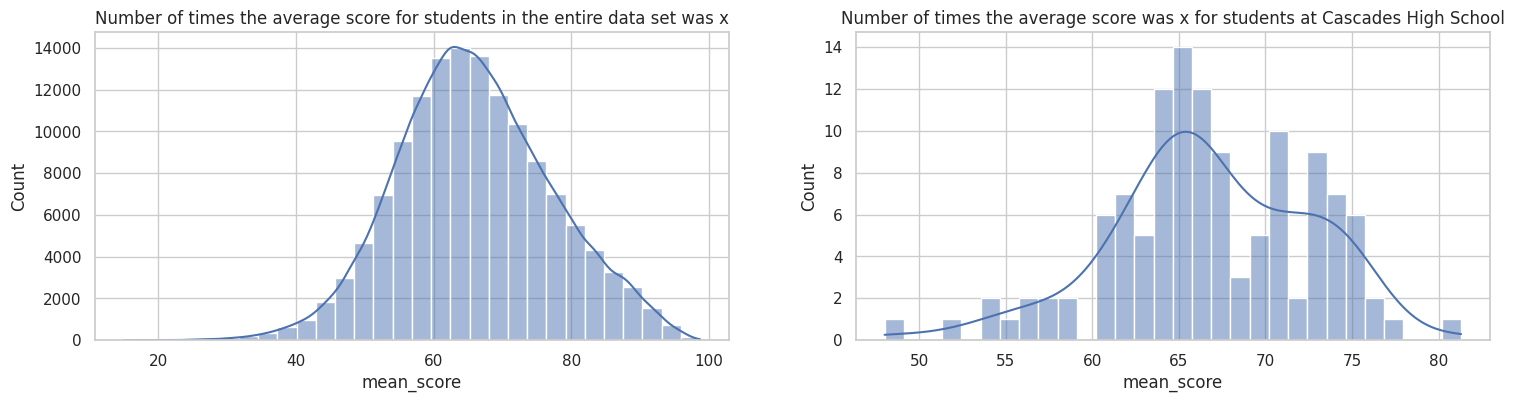

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))
sns.histplot(df['mean_score'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Number of times the average score for students in the entire data set was x')

sns.histplot(cascades_df['mean_score'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Number of times the average score was x for students at Cascades High School')

plt.show()